In [2]:
from operator import itemgetter
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests
import re

In [3]:
!curl -o "results.html" "https://www.strawpoll.me/20698970/r"

!echo "score, count" > results_table.txt
!sed -n -E 's|<p class="option-text"><span>([0-9]*)[^<]*</span> <span class="option-count" data-count="([0-9]*)">[^<]*</span></p>|\1, \2|gp' 'results.html' >> results_table.txt

% Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 28369  100 28369    0     0  73304      0 --:--:-- --:--:-- --:--:-- 73494


# Python

In [4]:
# requests and bs4
url = "https://www.strawpoll.me/20698970/r"
html_content = requests.get(url).text
soup = BeautifulSoup(html_content, "html.parser")

In [5]:
# processing html into python object
results = []

rlist = soup.find("div", attrs={"class": "results"})
data_items = rlist.find_all("p", attrs={"class": "option-text"})
for item in data_items:
    score = item.span.next
    # print("regex: ", re.search('\d*', score.string).group(0))
    score_trunc = re.search('\d*', score.string).group(0)
    tally = item.find("span", attrs={"class": "option-count"}).get("data-count")
    # print("{}, {}".format(score_trunc, tally))
    results.append((int(score_trunc), int(tally)))

results.sort(key=itemgetter(0))

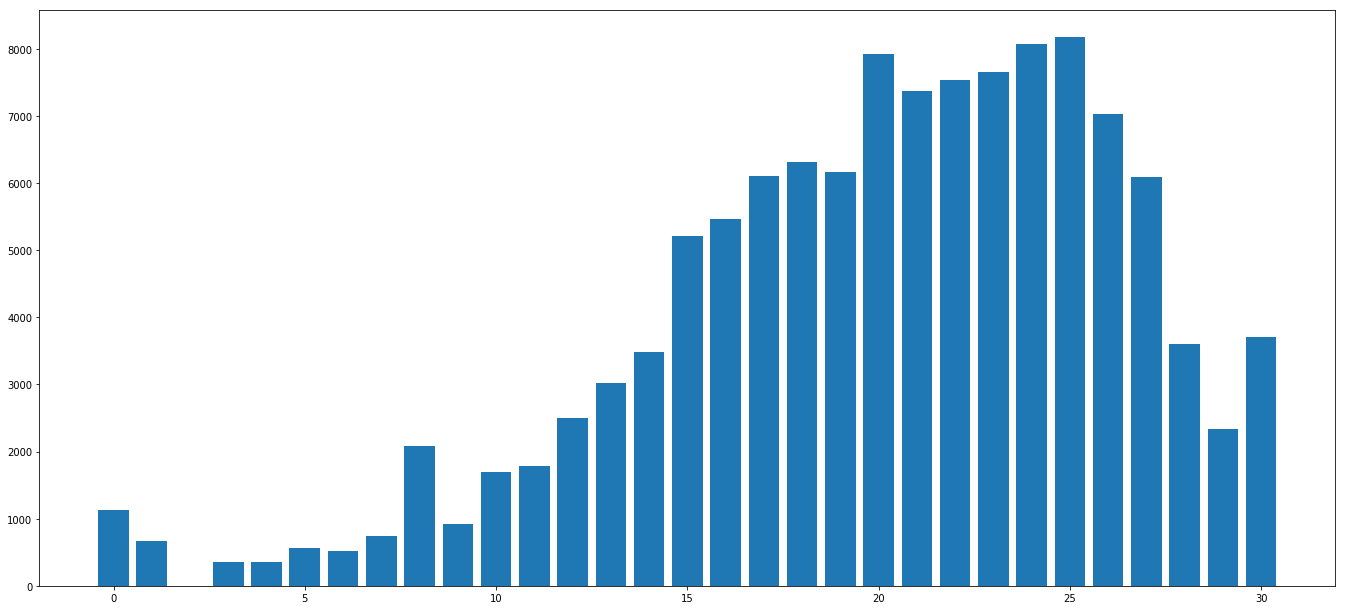

In [6]:
fig = plt.figure()
ax = fig.add_axes([0,0,3,2])
x_coords, y_coords = zip(*results)

ax.bar(x_coords, y_coords)
plt.show()

In [9]:
print("Poll results:")
print()
!cat results_table.txt

Poll results:

score, count
    25, 8172
    24, 8068
    20, 7923
    23, 7648
    22, 7541
    21, 7377
    26, 7026
    18, 6319
    19, 6164
    17, 6104
    27, 6090
    16, 5462
    15, 5204
    30, 3700
    28, 3598
    14, 3481
    13, 3016
    12, 2506
    29, 2329
    8, 2083
    11, 1789
    10, 1697
    0, 1136
    9, 927
    7, 746
    1, 662
    5, 558
    6, 524
    4, 355
    3, 348
